In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

from utils import summarize_df, plot_signals_p_value, plot_signals_auc, plot_signals_gini, plot_conf_int, plot_correction
from statsmodels.stats.multitest import multipletests

In [2]:
infections = pd.read_csv('epi_data_age_gender.csv')
healthy_idxs = list(infections[infections.Group == 'HC'].ID)
uninf_idxs = list(infections[(infections.Group != 'HC') & (infections.Infection != 'Yes')].ID)
data = pd.read_excel('S1File.xlsx', sheet_name = 'CFS_JPT_Seroarray')
data = data.iloc[1254:1270]
data = data[list(data.columns[:8])+healthy_idxs+uninf_idxs]

# Signals

In [3]:
smr, all_lower_bounds, all_p_values, auc, gini = summarize_df(data, 8, 58)

**Chi-squared**

In [4]:
smr_p_value = smr[['name', 'min_p_value', 'test_lower_bound', 'test_upper_bound']]
smr_p_value.columns = ['ID', 'minimum p-value', 'lower bound', 'upper bound']
smr_p_value.iloc[:, 2:] = np.round(smr_p_value.iloc[:, 2:], 3)
smr_p_value

,ID,minimum p-value,lower bound,upper bound
0,EBNA1_0415 (AG876),0.001507,987.000,997.667
1,EBNA1_0415 (B95-8),0.034439,939.000,963.333
2,EBNA1_0419 (AG876),0.178873,844.000,845.667
3,"EBNA1_0419 (B95-8, GD1)",0.020677,1033.333,1034.000
4,EBNA1_0423 (AG876),0.026980,866.667,871.500
5,"EBNA1_0423 (B95-8, GD1)",0.040382,1195.667,1197.333
6,EBNA1_0427 (GD1),0.134204,928.667,949.333
7,"EBNA1_0430 (AG876, B95-8)",0.044809,873.667,889.333
8,EBNA1_0431 (GD1),0.011503,933.000,933.667
9,"EBNA1_0434 (AG876, B95-8)",0.018761,923.333,929.333


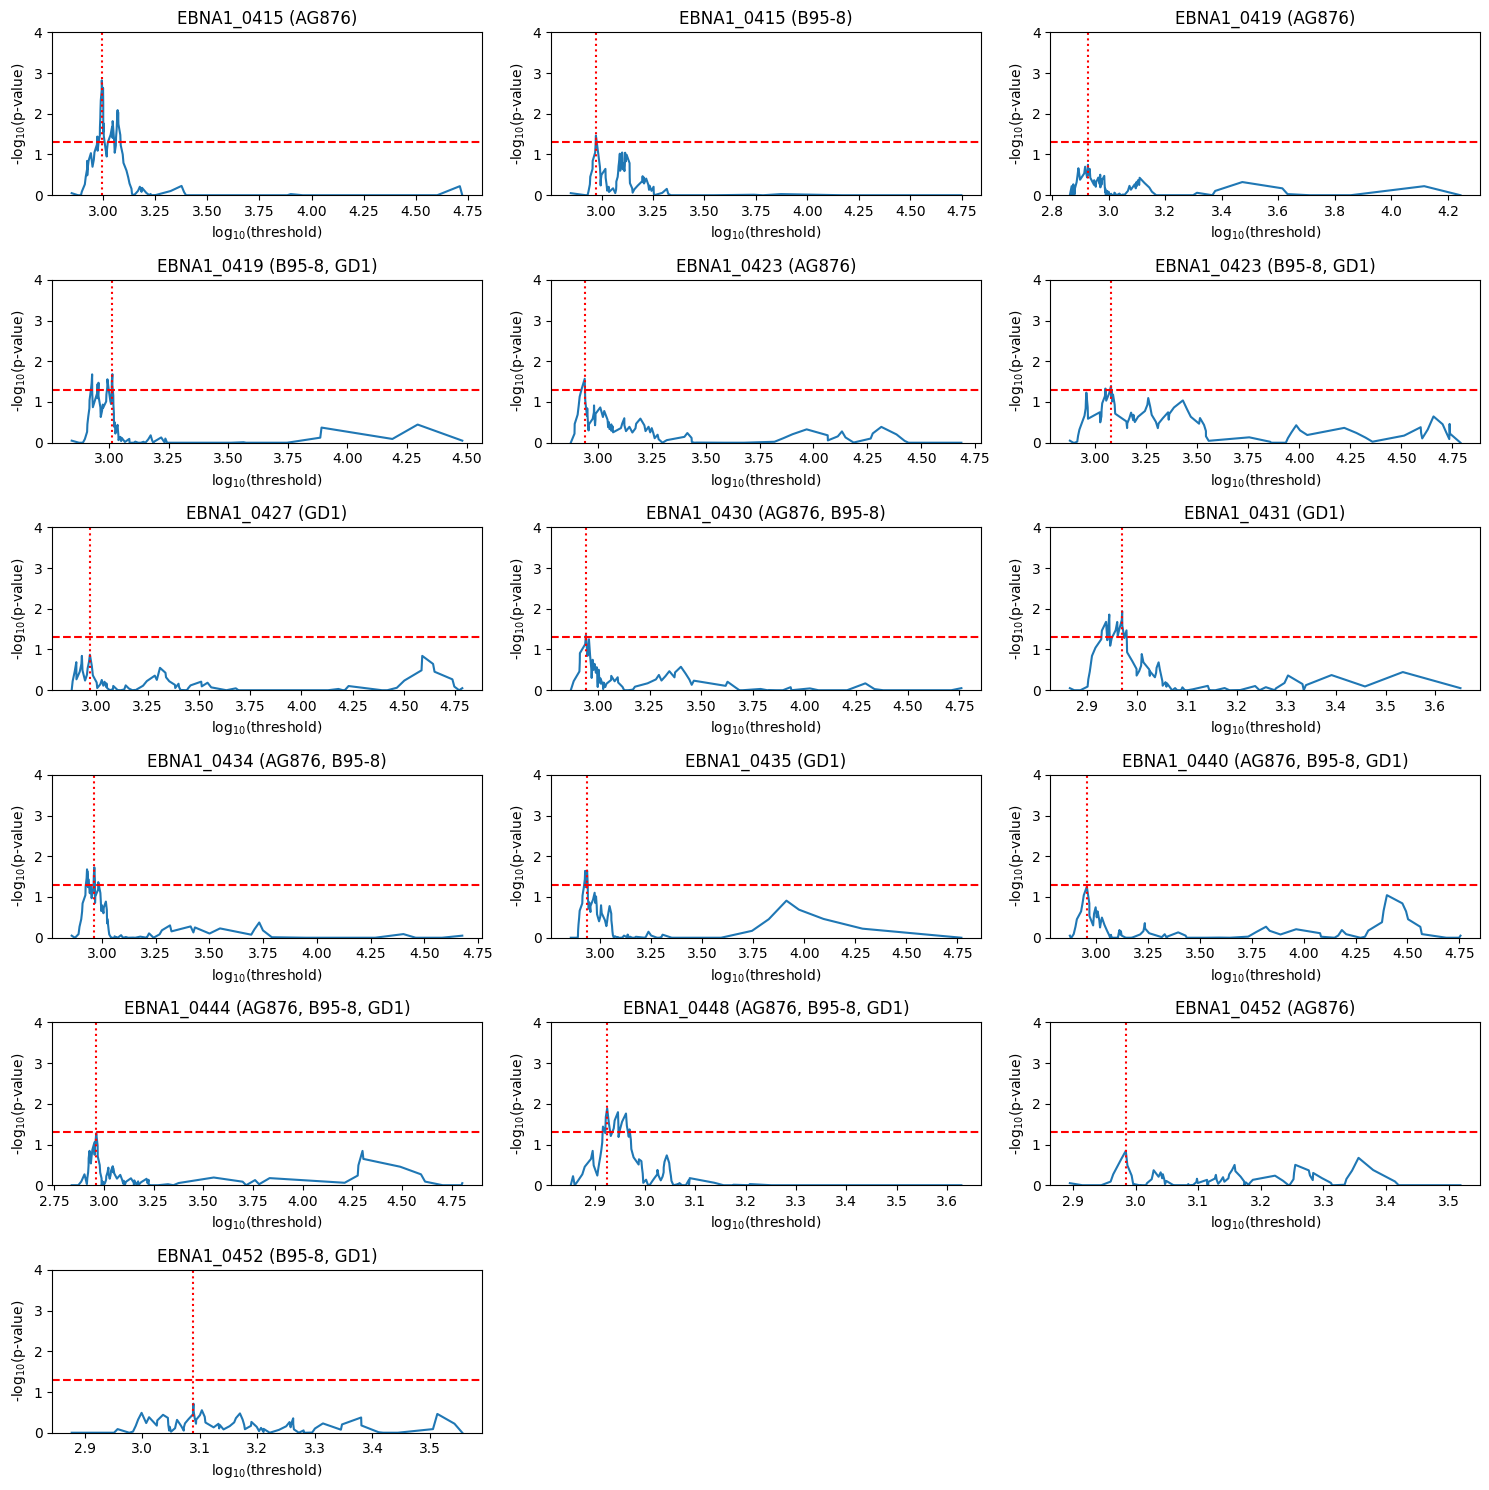

In [5]:
plot_signals_p_value(smr, all_lower_bounds, all_p_values)

**AUC**

In [6]:
smr_auc = smr[['name', 'max_auc', 'auc_lower_bound', 'auc_upper_bound']]
smr_auc.columns = ['ID', 'maximum AUC', 'lower bound', 'upper bound']
smr_auc.iloc[:, 2:] = np.round(smr_auc.iloc[:, 2:], 3)
smr_auc

,ID,maximum AUC,lower bound,upper bound
0,EBNA1_0415 (AG876),0.667368,987.000,997.667
1,EBNA1_0415 (B95-8),0.602632,1302.000,1313.000
2,EBNA1_0419 (AG876),0.567368,844.000,845.667
3,"EBNA1_0419 (B95-8, GD1)",0.635263,1033.333,1034.000
4,EBNA1_0423 (AG876),0.581053,1023.500,1053.000
5,"EBNA1_0423 (B95-8, GD1)",0.611053,1195.667,1197.333
6,EBNA1_0427 (GD1),0.570526,928.667,949.333
7,"EBNA1_0430 (AG876, B95-8)",0.576842,904.000,915.667
8,EBNA1_0431 (GD1),0.634211,933.000,933.667
9,"EBNA1_0434 (AG876, B95-8)",0.624211,923.333,929.333


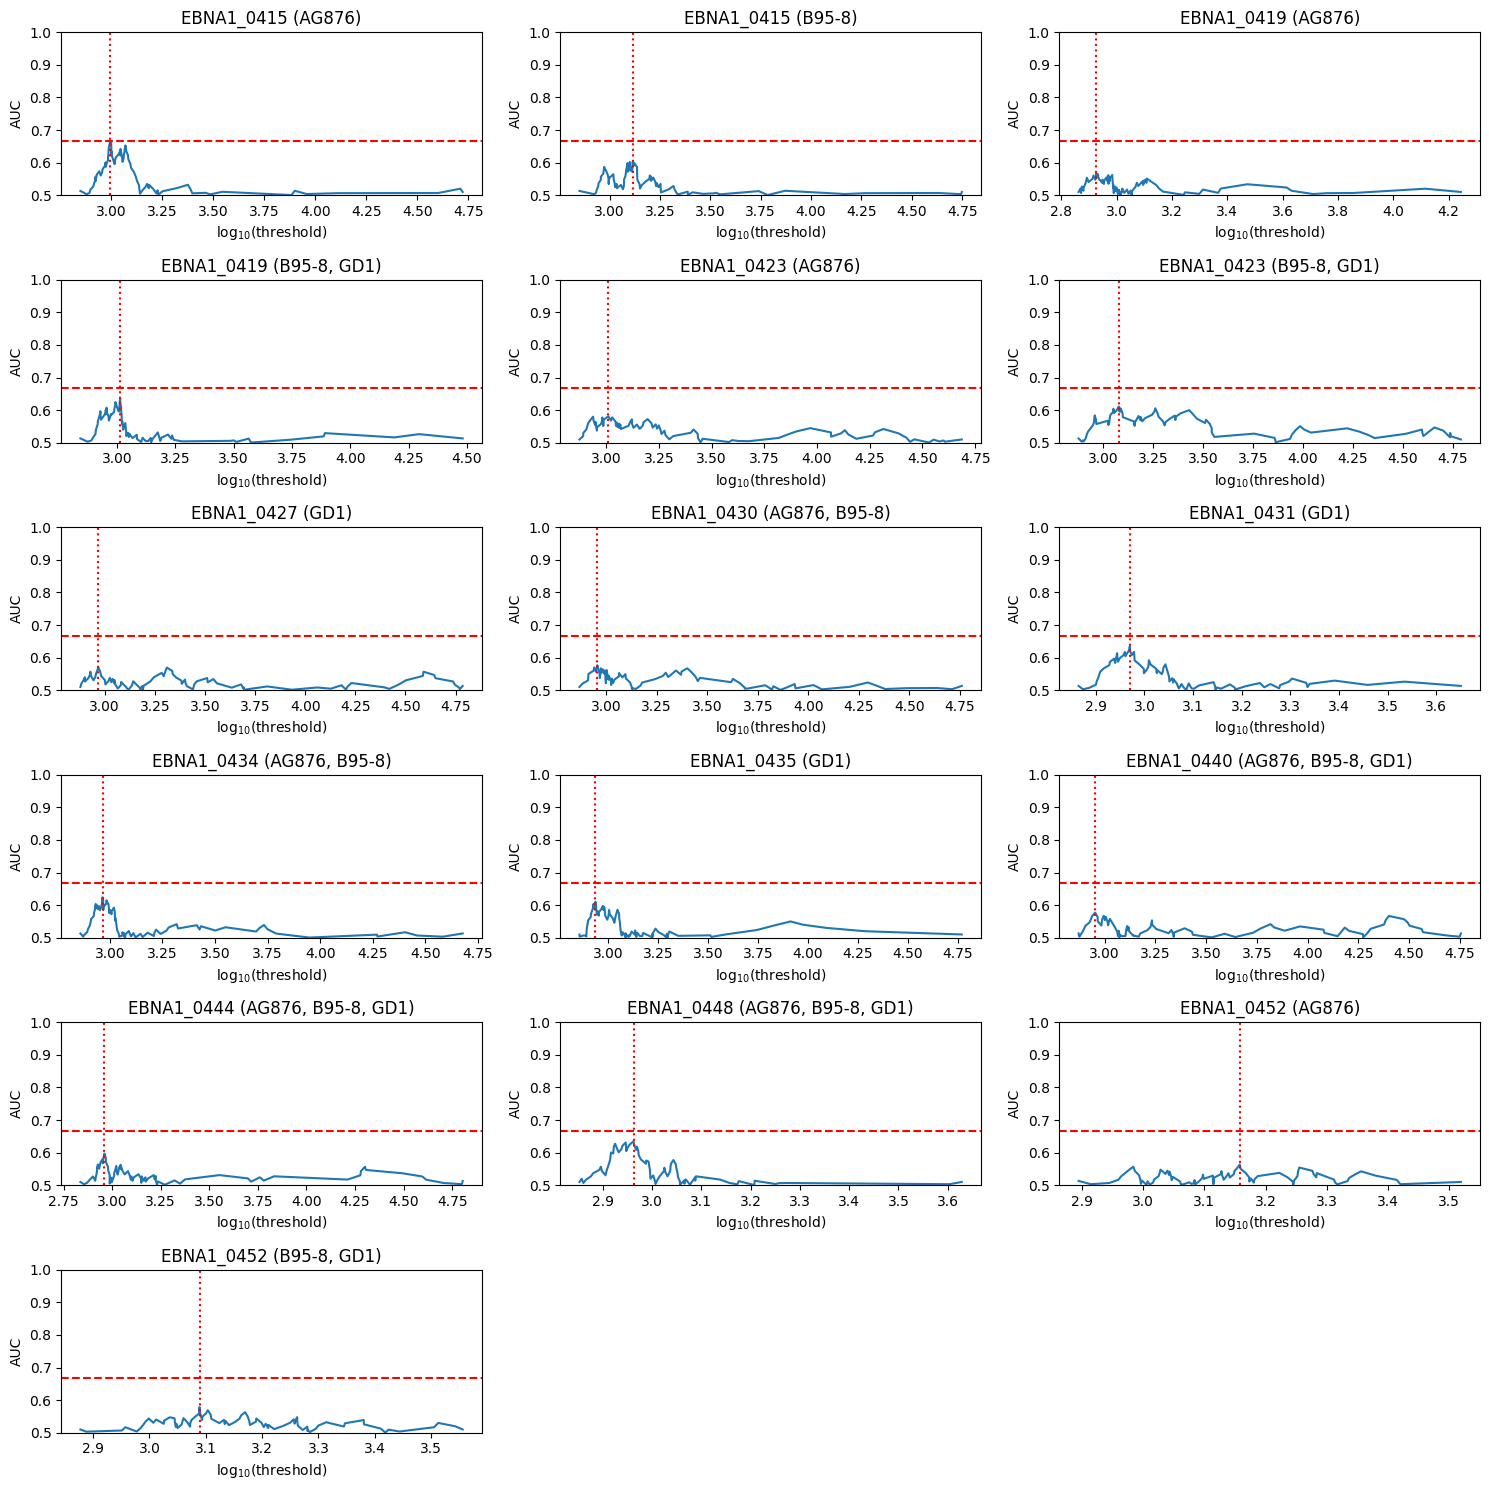

In [7]:
plot_signals_auc(smr, all_lower_bounds, auc)

**Gini decrease**

In [8]:
smr_gini = smr[['name', 'max_gini', 'gini_lower_bound', 'gini_upper_bound']]
smr_gini.columns = ['ID', 'maximum Gini decrease', 'lower bound', 'upper bound']
smr_gini.iloc[:, 2:] = np.round(smr_gini.iloc[:, 2:], 3)
smr_gini

,ID,maximum Gini decrease,lower bound,upper bound
0,EBNA1_0415 (AG876),0.064806,987.000,997.667
1,EBNA1_0415 (B95-8),0.033205,939.000,963.333
2,EBNA1_0419 (AG876),0.014692,844.000,845.667
3,"EBNA1_0419 (B95-8, GD1)",0.038350,850.000,850.667
4,EBNA1_0423 (AG876),0.037293,866.667,871.500
5,"EBNA1_0423 (B95-8, GD1)",0.029202,1195.667,1197.333
6,EBNA1_0427 (GD1),0.018827,848.667,854.333
7,"EBNA1_0430 (AG876, B95-8)",0.032229,873.667,889.333
8,EBNA1_0431 (GD1),0.042651,933.000,933.667
9,"EBNA1_0434 (AG876, B95-8)",0.038350,853.667,856.000


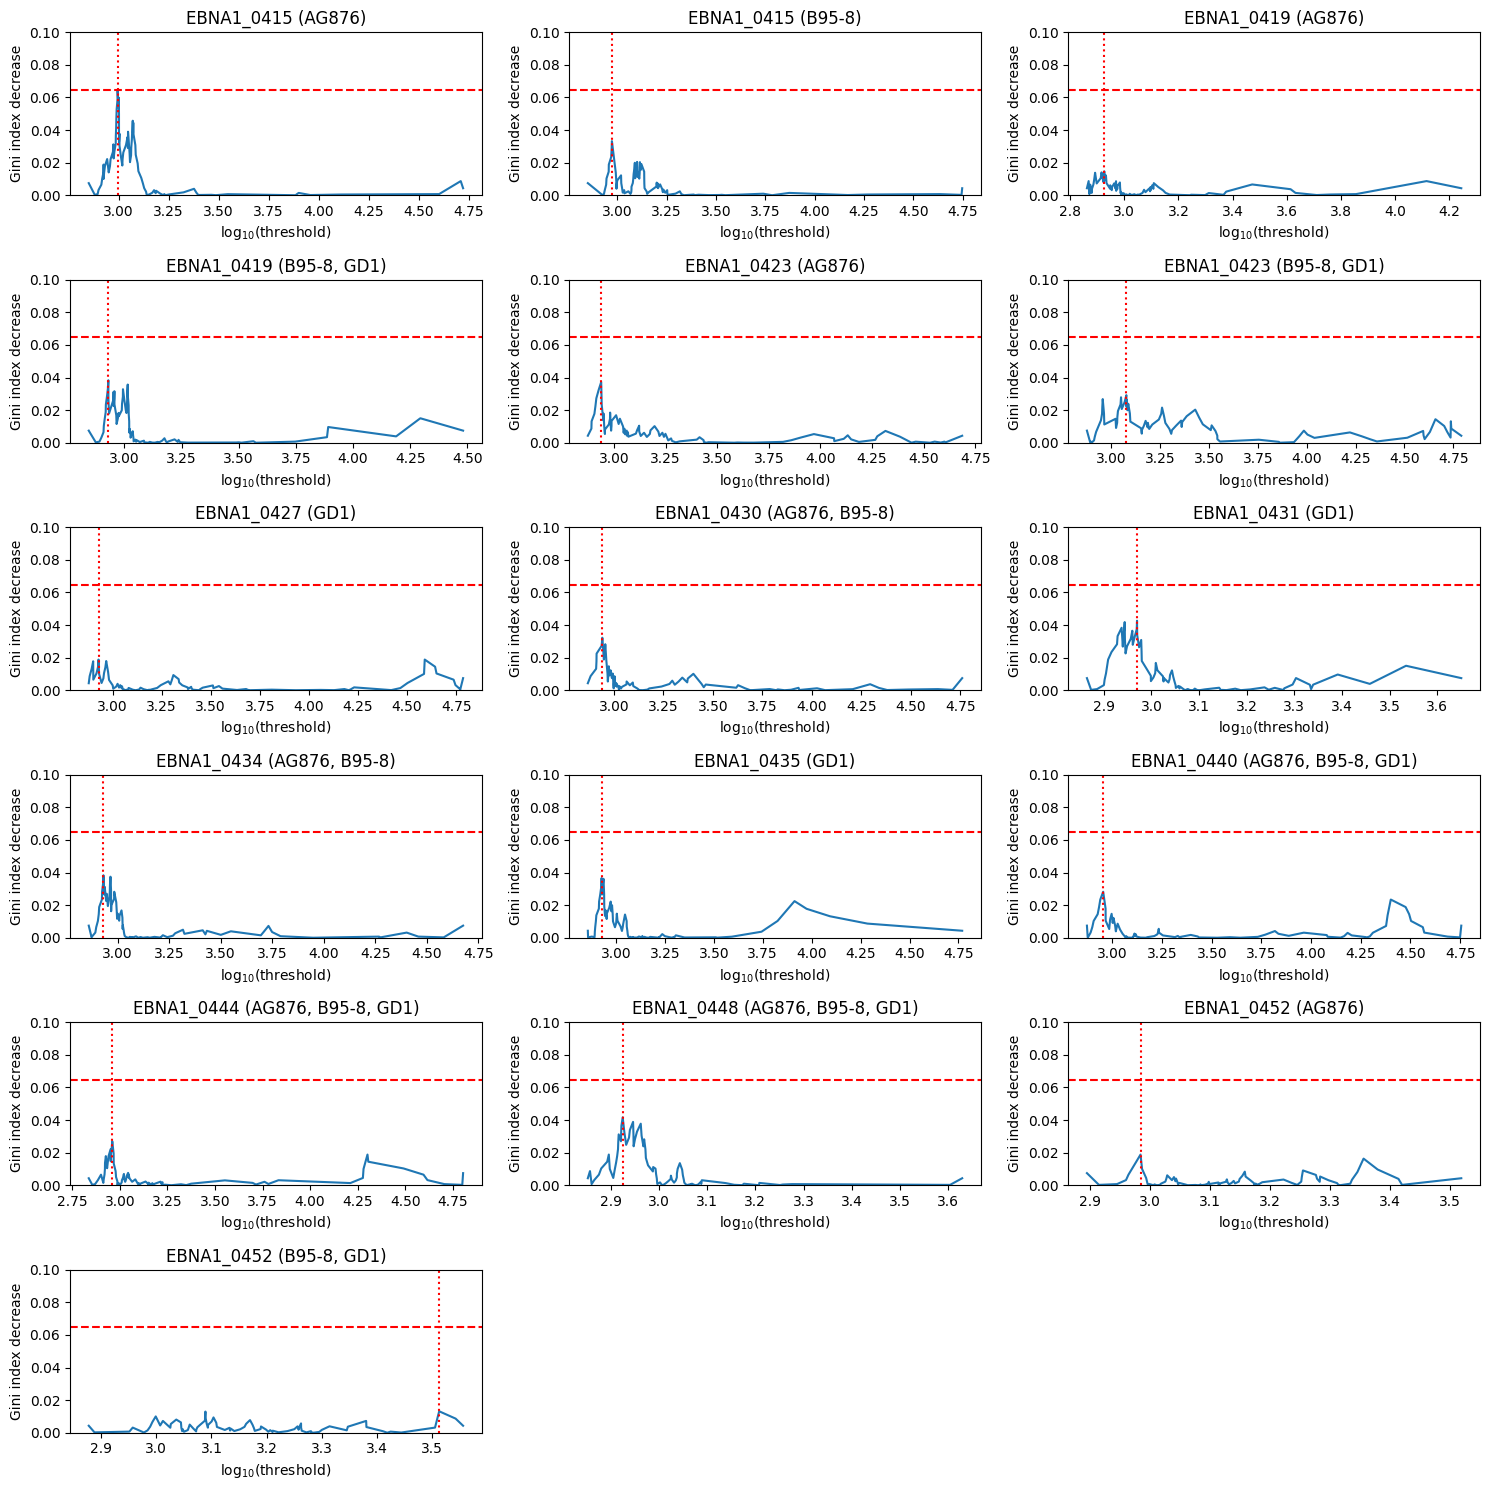

In [9]:
plot_signals_gini(smr, all_lower_bounds, gini)

**Summary of thresholds**

In [10]:
thr_p_value = np.round(smr.test_lower_bound, 2).astype(str) + ' - ' + np.round(smr.test_upper_bound, 2).astype(str)
thr_auc = np.round(smr.auc_lower_bound, 2).astype(str) + ' - ' + np.round(smr.auc_upper_bound, 2).astype(str)
thr_gini = np.round(smr.gini_lower_bound, 2).astype(str) + ' - ' + np.round(smr.gini_upper_bound, 2).astype(str)
pd.DataFrame({'ID': smr.name, 'Chi-squared': thr_p_value, 'AUC': thr_auc, 'Gini': thr_gini})

,ID,Chi-squared,AUC,Gini
0,EBNA1_0415 (AG876),987.0 - 997.67,987.0 - 997.67,987.0 - 997.67
1,EBNA1_0415 (B95-8),939.0 - 963.33,1302.0 - 1313.0,939.0 - 963.33
2,EBNA1_0419 (AG876),844.0 - 845.67,844.0 - 845.67,844.0 - 845.67
3,"EBNA1_0419 (B95-8, GD1)",1033.33 - 1034.0,1033.33 - 1034.0,850.0 - 850.67
4,EBNA1_0423 (AG876),866.67 - 871.5,1023.5 - 1053.0,866.67 - 871.5
5,"EBNA1_0423 (B95-8, GD1)",1195.67 - 1197.33,1195.67 - 1197.33,1195.67 - 1197.33
6,EBNA1_0427 (GD1),928.67 - 949.33,928.67 - 949.33,848.67 - 854.33
7,"EBNA1_0430 (AG876, B95-8)",873.67 - 889.33,904.0 - 915.67,873.67 - 889.33
8,EBNA1_0431 (GD1),933.0 - 933.67,933.0 - 933.67,933.0 - 933.67
9,"EBNA1_0434 (AG876, B95-8)",923.33 - 929.33,923.33 - 929.33,853.67 - 856.0


# Confidence intervals

In [11]:
smr_copy = smr[['name', 'proportion_min_g1', 'test_g1_prop_above', 'proportion_max_g1', 'proportion_min_g2', 'test_g2_prop_above', 'proportion_max_g2']]
smr_copy.columns = ['ID', 'healthy (min)', 'healthy (mean)', 'healthy (max)', 'unifected CFS (min)', 'uninfected CFS (mean)', 'uninfected CFS (max)']
smr_copy.iloc[:, 1:] = np.round(smr_copy.iloc[:, 1:], 2)
smr_copy

,ID,healthy (min),healthy (mean),healthy (max),unifected CFS (min),uninfected CFS (mean),uninfected CFS (max)
0,EBNA1_0415 (AG876),0.42,0.56,0.70,0.80,0.89,0.99
1,EBNA1_0415 (B95-8),0.69,0.80,0.91,0.92,0.97,1.00
2,EBNA1_0419 (AG876),0.64,0.76,0.88,0.80,0.89,0.99
3,"EBNA1_0419 (B95-8, GD1)",0.30,0.44,0.58,0.57,0.71,0.85
4,EBNA1_0423 (AG876),0.74,0.84,0.94,1.00,1.00,1.00
5,"EBNA1_0423 (B95-8, GD1)",0.49,0.62,0.75,0.73,0.84,0.96
6,EBNA1_0427 (GD1),0.67,0.78,0.89,0.84,0.92,1.00
7,"EBNA1_0430 (AG876, B95-8)",0.76,0.86,0.96,1.00,1.00,1.00
8,EBNA1_0431 (GD1),0.46,0.60,0.74,0.76,0.87,0.98
9,"EBNA1_0434 (AG876, B95-8)",0.49,0.62,0.75,0.76,0.87,0.98


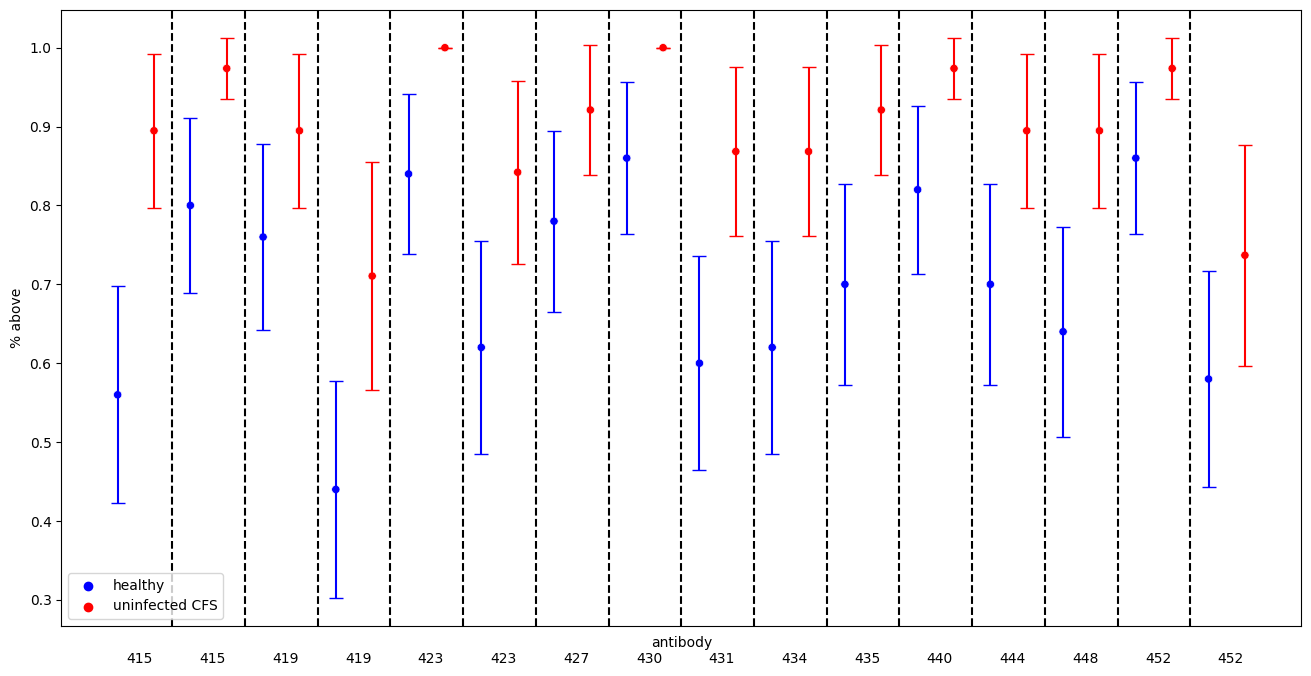

In [12]:
plot_conf_int(smr, 'healthy', 'uninfected CFS', True)

# Multiple testing correction

In [13]:
ag876 = 'FEYHQEGGPDGEPDMPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWYG'
ag876_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
ag876_target = 16
b958 = 'FEYHQEGGPDGEPDVPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWFG'
b958_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
b958_target = 16
gd1 = 'QEGGPDGEPDVPPGAIEQGPTDDPGEGPSTGPRGQGDGGRRKKGGWFG'
gd1_stop = [15, 19, 23, 27, 31, 36, 40, 44, 48]
gd1_target = 12

In [14]:
adj_p_values_bonf = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'bonferroni')[1])
adj_p_values_bh = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_bh')[1])
adj_p_values_by = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_by')[1])
adj_p_values_bky = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_tsbky')[1])

In [15]:
adj_p_values = [adj_p_values_bonf, adj_p_values_bh, adj_p_values_by, adj_p_values_bky]
correction_types = ['Bonferroni' ,'Benjamini-Hochberg', 'Benjamini-Yekutieli', '2-stage Benjamini-Krieger-Yekutieli']
strains = ['AG876', 'B95-8', 'GD1']
strain_seqs = [ag876, b958, gd1]
strain_stops = [ag876_stop, b958_stop, gd1_stop]
strain_targets = [ag876_target, b958_target, gd1_target]

In [16]:
pvals = np.round(pd.DataFrame({k:v for k,v in zip(correction_types, adj_p_values)}), 3)
pvals.insert(0, 'ID', smr.name)
pvals

,ID,Bonferroni,Benjamini-Hochberg,Benjamini-Yekutieli,2-stage Benjamini-Krieger-Yekutieli
0,EBNA1_0415 (AG876),1.618,1.618,1.089,1.624
1,EBNA1_0415 (B95-8),0.259,1.162,0.633,1.169
2,EBNA1_0419 (AG876),-0.000,0.719,0.190,0.726
3,"EBNA1_0419 (B95-8, GD1)",0.480,1.219,0.690,1.226
4,EBNA1_0423 (AG876),0.365,1.210,0.681,1.217
5,"EBNA1_0423 (B95-8, GD1)",0.190,1.145,0.616,1.151
6,EBNA1_0427 (GD1),-0.000,0.785,0.256,0.792
7,"EBNA1_0430 (AG876, B95-8)",0.145,1.145,0.616,1.151
8,EBNA1_0431 (GD1),0.735,1.219,0.690,1.226
9,"EBNA1_0434 (AG876, B95-8)",0.523,1.219,0.690,1.226


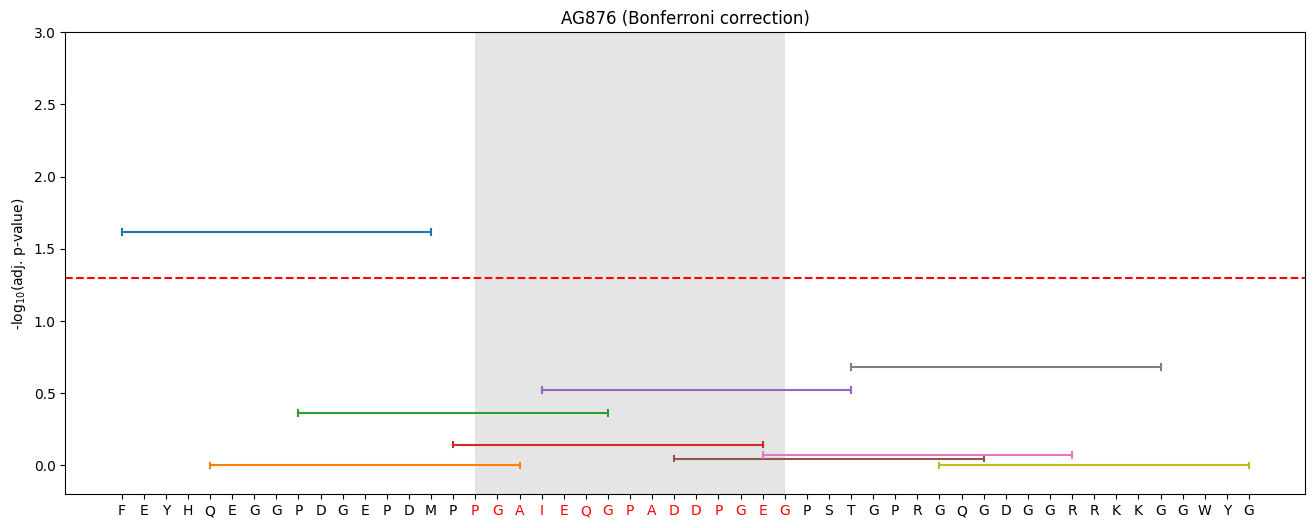

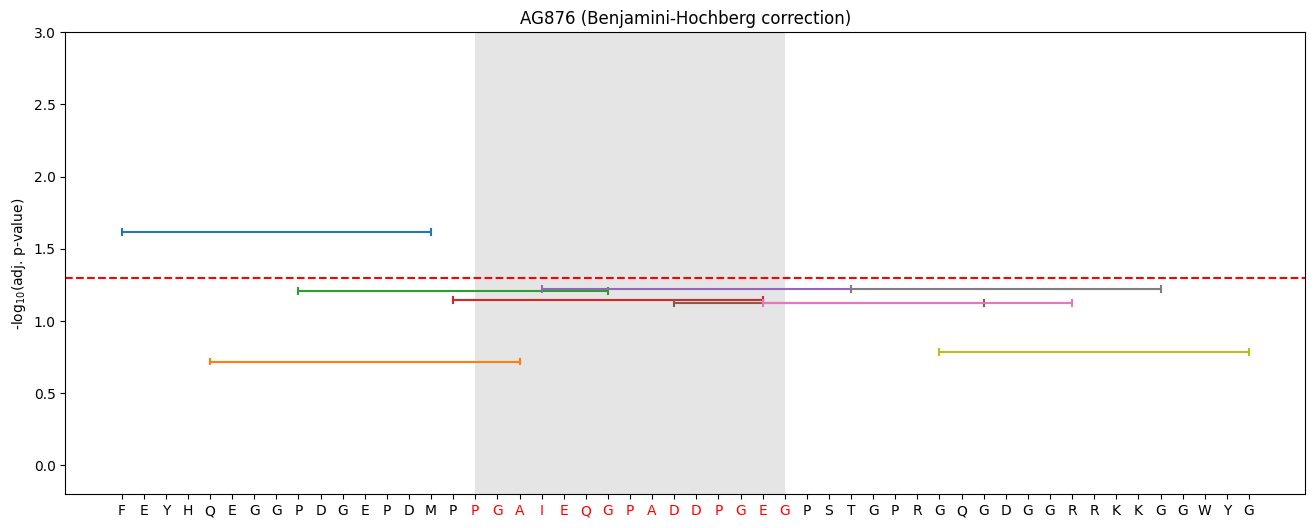

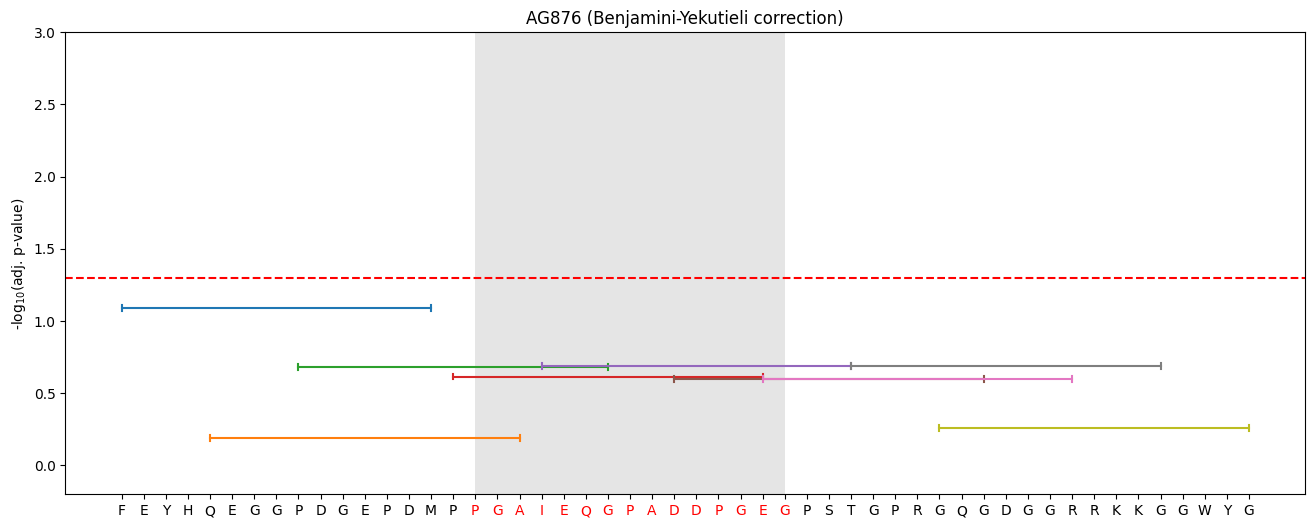

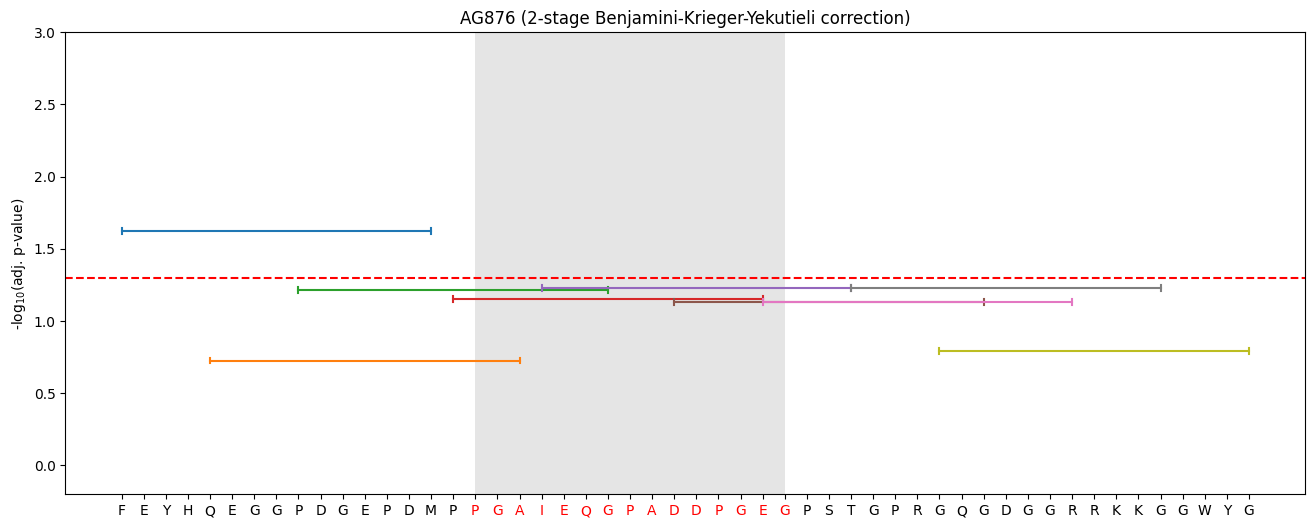

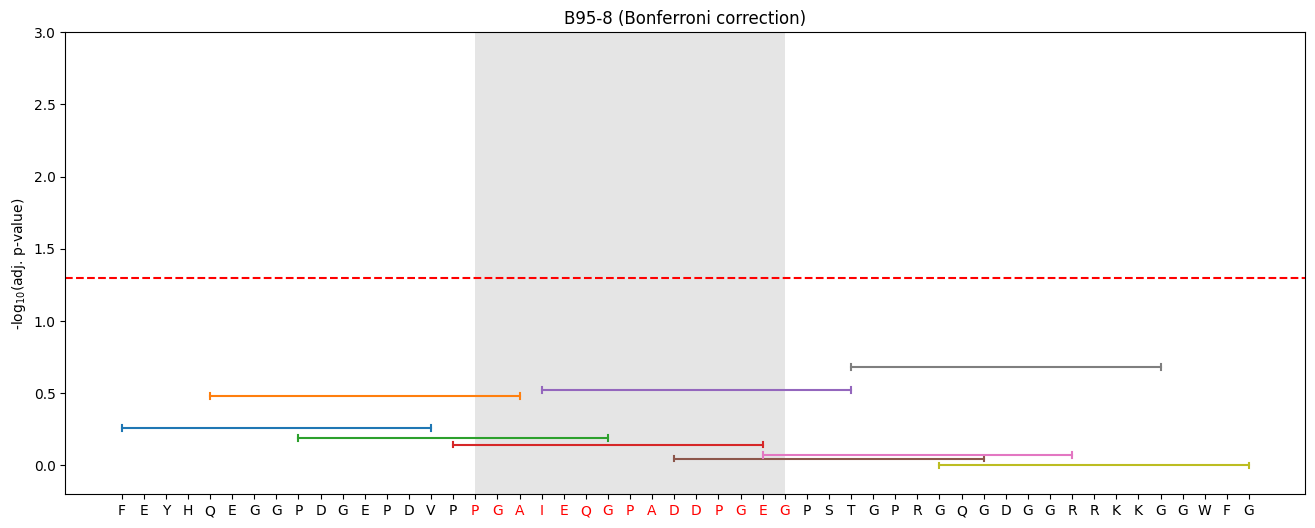

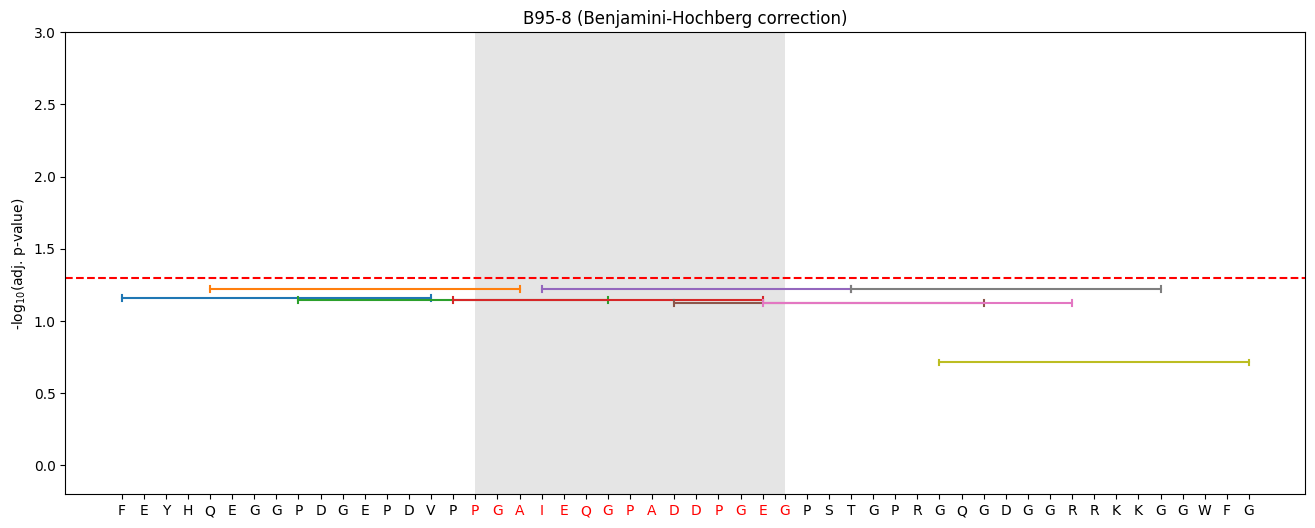

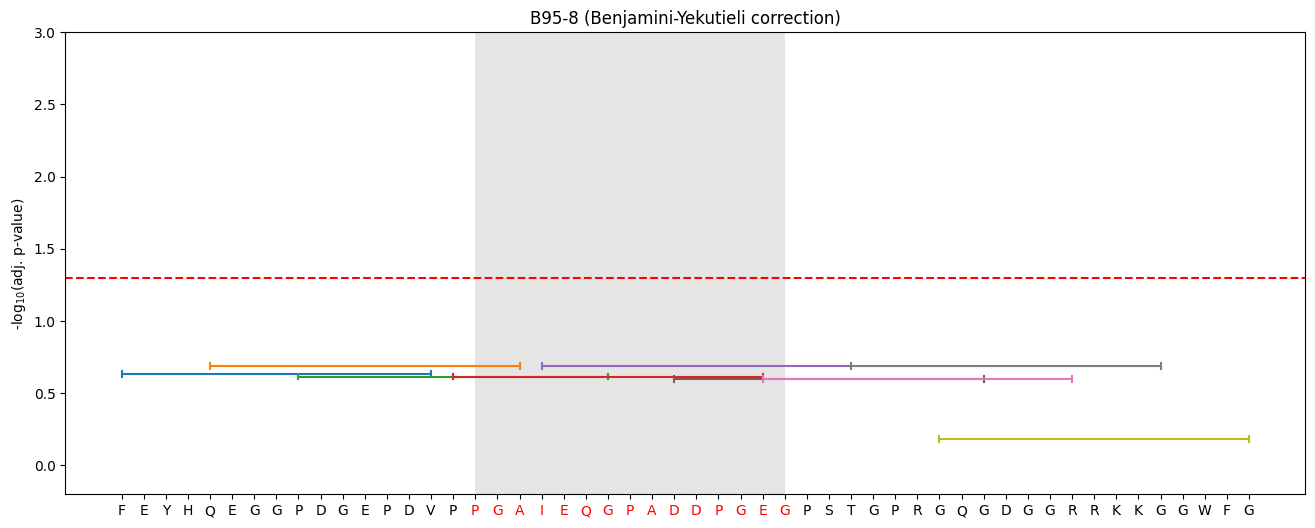

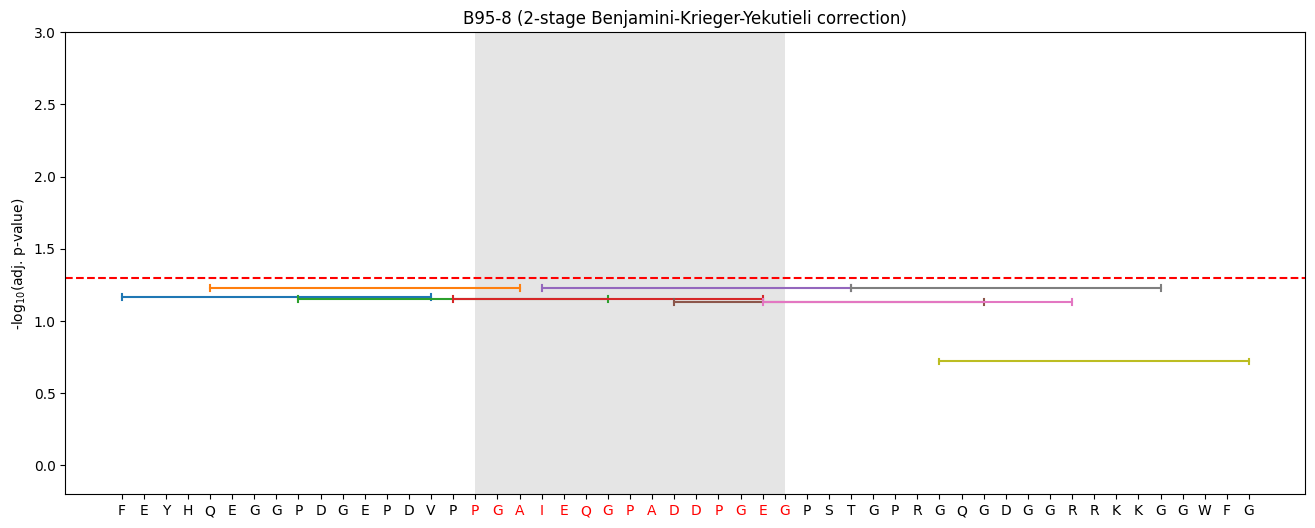

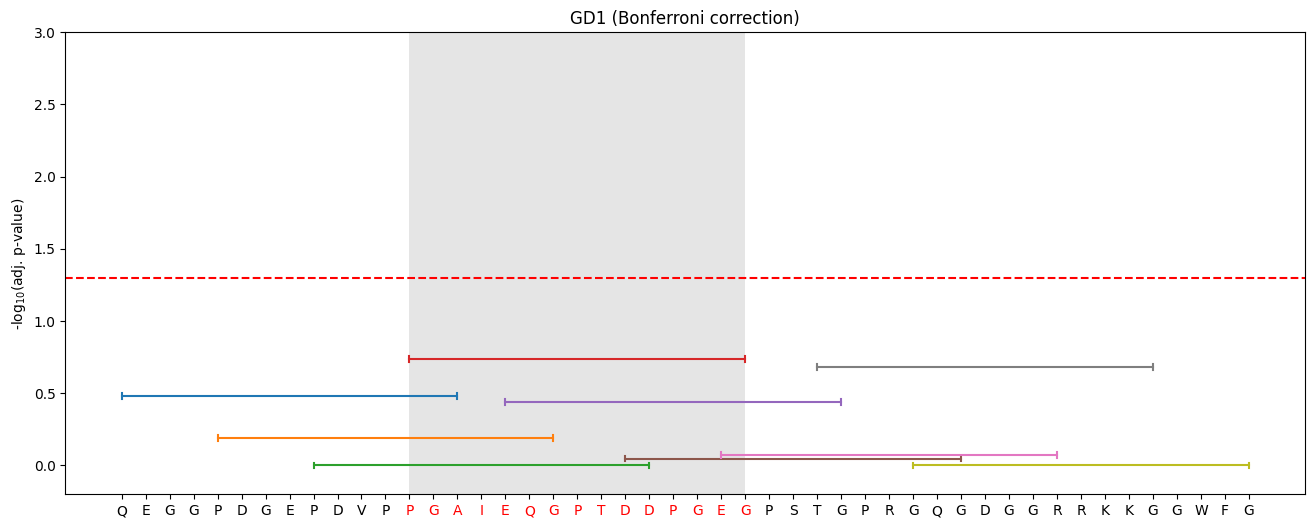

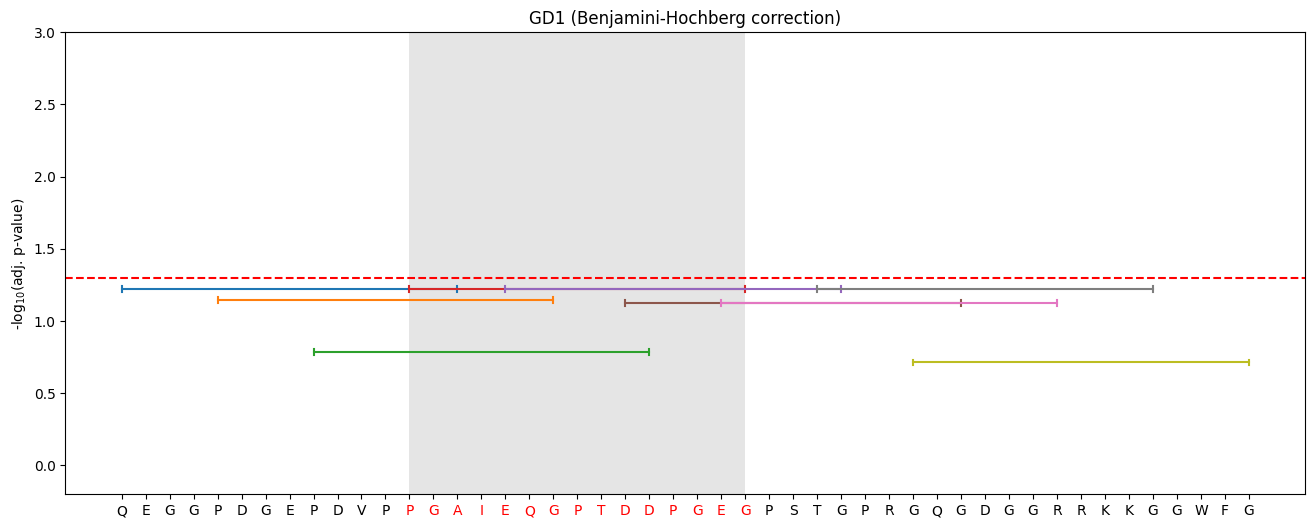

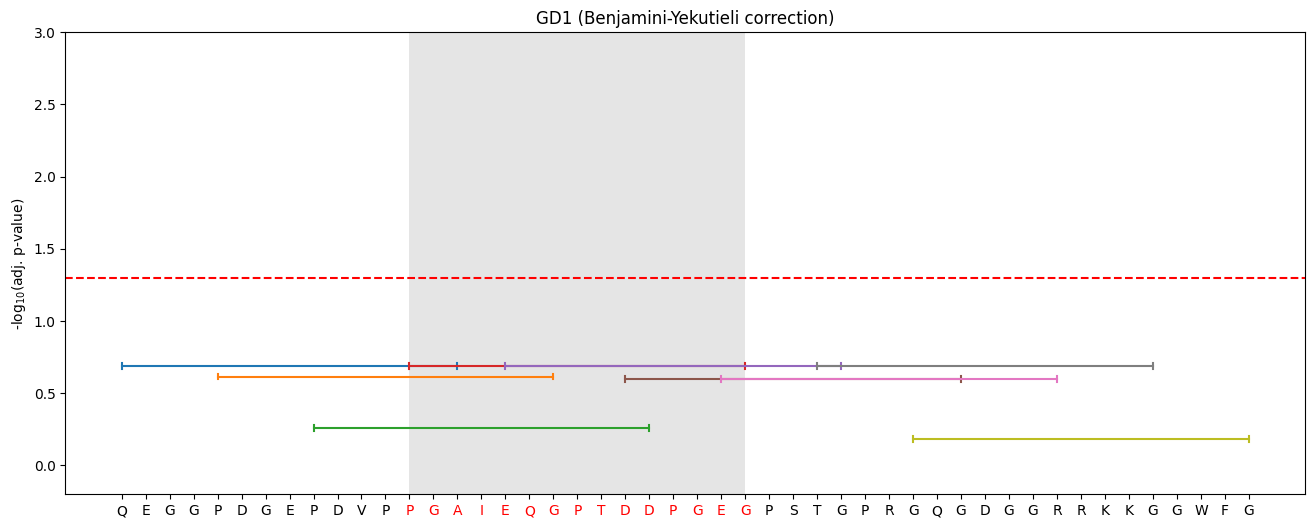

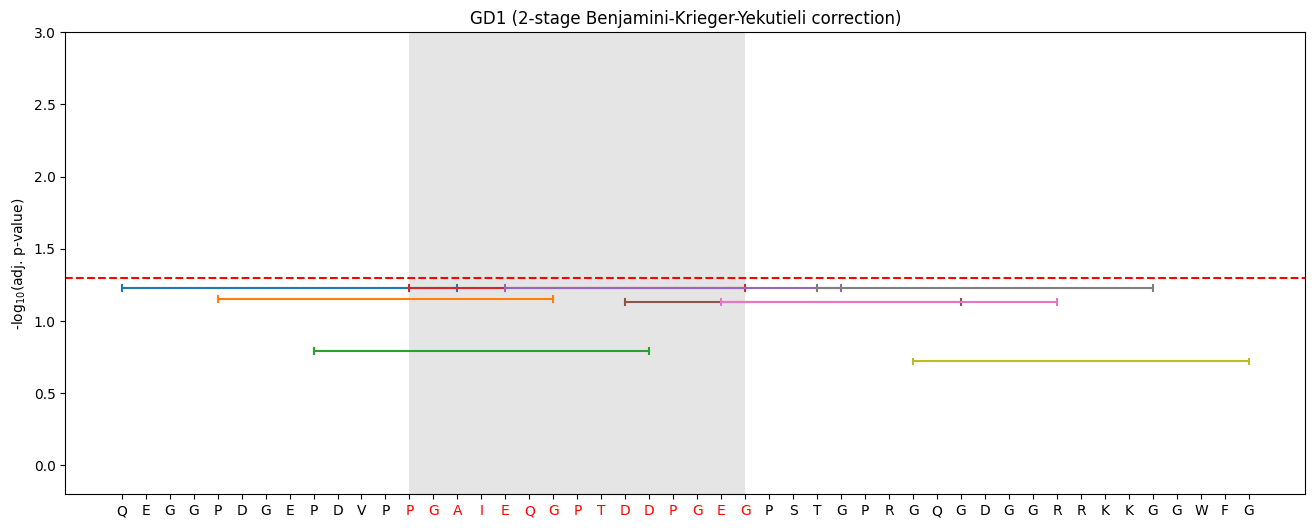

In [17]:
for j in range(len(strains)):
    for i in range(len(correction_types)):
        plot_correction(smr.groups, adj_p_values[i], correction_types[i], strains[j], strain_seqs[j], strain_stops[j], strain_targets[j])